### Importamos las librerias que vamos a usar

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importamos el csv

In [150]:
attack = pd.read_csv('attacks.csv', encoding="cp1252")

### Vamos a hacer una copia del dataset

In [151]:
df=attack.copy()

### Vamos a explorar el dataset y vamos a proceder a limpiar los datos que no consideremos útiles para el análisis

In [152]:
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A simple vista parece que vamos tener filas y algunas columnas que tienen muchos NaN.

### Vamos a ver el nombre de las colummnas

In [153]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

Observamos que, no todos los nombres empiezan por mayúscula, y que tenemos la variable 'Sex' y la variable 'Species', que ambas tienen un espacio al final en el texto. Vamos modificar estas dos cosas.

In [154]:
#Este código va a convertir la primera letra de cada columna de nuestro dataset en mayúscula.
df.columns = [columns.capitalize() for columns in df.columns]

In [155]:
#Este código va a renombrar la columna 'Sex ' y la columna 'Species ' quitando el espacio final del texto.
df=df.rename(columns={"Sex ": "Sex" , "Species " : "Species" })

In [156]:
df

,Case number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or source,Pdf,Href formula,Href,Case number.1,Case number.2,Original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Quiero ver el porcentaje de nulos que tiene cada columnna para ver si las puedo aprovechar.

In [157]:
#Calculo el porcentaje de valores NaN por cada columna.
porcentaje_nan = round(df.isna().sum()*100/len(df),1) 
porcentaje_nan.sort_values(ascending = False)

Unnamed: 23               100.0
Unnamed: 22               100.0
Time                       88.5
Species                    86.5
Age                        86.5
Sex                        77.7
Activity                   77.6
Fatal (y/n)                77.6
Location                   77.6
Area                       77.3
Name                       76.3
Country                    75.7
Injury                     75.6
Investigator or source     75.6
Date                       75.5
Type                       75.5
Pdf                        75.5
Href formula               75.5
Href                       75.5
Case number.1              75.5
Case number.2              75.5
Original order             75.5
Year                       75.5
Case number                66.2
dtype: float64

Vemos que la columna "Unnamed: 22" y "Unnamed: 23" tienen un 100% de NaN, las vamos a eliminar.

### Limpiar el DataFrame

Voy a limpiar el Dataframe quitando las filas que tengan 20 o más de nulos. De esta manera estoy usando filas que tenga la gran mayoria de valores presentes en sus columnas.

In [158]:
df.dropna(axis=0, thresh=20, inplace=True)

Voy a limpiar el Dataframe quitando las columnas "Unnamend: 22" y "Unnamed: 23". Ya que tienen un 100% de NaN.

In [159]:
df.drop(["Unnamed: 22", "Unnamed: 23"], axis=1, inplace=True)

Ahora voy a eliminar las filas duplicadas

Voy a ver otra vez como tenemos los procetajes de NaN por columnas

In [161]:
df.drop_duplicates(inplace=True)

In [162]:
df

,Case number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (y/n),Time,Species,Investigator or source,Pdf,Href formula,Href,Case number.1,Case number.2,Original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,ND.0038,1941-1942,0.0,Unprovoked,IRAQ,Basrah,Shatt-el Arab River near a small boat stand,Swimming,male,M,...,Y,Afternoon,Bull shark,B.W. Coad & L.A.J. Al-Hassan,ND-0038-Shatt-al-Arab.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0038,ND.0038,38.0
6266,ND.0037,1940 - 1950,0.0,Unprovoked,SAUDI ARABIA,Eastern Province,East of the Ras Tanura-Jubail area,Diving,a pearl diver,M,...,Y,NaN,"""a black-tipped shark""",G.F. Mead,ND-0037-PearlDiver-sepsis.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0037,ND.0037,37.0
6267,ND.0036,1940 - 1950,0.0,Unprovoked,SAUDI ARABIA,Eastern Province,East of the Ras Tanura-Jubail area,Diving,a fisherman / diver,M,...,N,NaN,6' shark,G.F. Mead,ND-0036-Fisherman-SaudiArabia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0036,ND.0036,36.0
6296,ND.0006,Before 1906,0.0,Unprovoked,AUSTRALIA,New South Wales,,Swimming,Arab boy,M,...,Y,NaN,Said to involve a grey nurse shark that leapt ...,"L. Becke in New York Sun, 9/9/1906; L. Schultz...",ND-0006-ArabBoy-Prymount.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0006,ND.0006,7.0


In [163]:
porcentaje_nan = round(df.isna().sum()*100/len(df),1) 
porcentaje_nan.sort_values(ascending = False)

Species                   31.7
Time                      31.4
Age                       21.2
Fatal (y/n)                5.1
Sex                        1.4
Activity                   1.3
Location                   1.2
Area                       1.1
Name                       0.1
Investigator or source     0.1
Case number                0.0
Pdf                        0.0
Case number.2              0.0
Case number.1              0.0
Href                       0.0
Href formula               0.0
Injury                     0.0
Date                       0.0
Country                    0.0
Type                       0.0
Year                       0.0
Original order             0.0
dtype: float64

### Con el dataframe actual vamos a crear un dataframe para las hipótesis con las variables que nos interesan.

Voy a eliminar las columnas que no me interesan para hacer las hopótesis. Las columnas que vamos a eliminar son "Investigator or source", "Case number", "Pdf", "Case number.2", "Case number.1", "Href", "Href formula" y "Original order".

In [164]:
df.drop(["Investigator or source", "Case number", "Pdf", "Case number.2", "Case number.1", "Href", "Href formula", "Original order"], axis=1, inplace=True)

In [165]:
df

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (y/n),Time,Species
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,1941-1942,0.0,Unprovoked,IRAQ,Basrah,Shatt-el Arab River near a small boat stand,Swimming,male,M,13 or 14,"FATAL, left leg bitten with severe blood loss",Y,Afternoon,Bull shark
6266,1940 - 1950,0.0,Unprovoked,SAUDI ARABIA,Eastern Province,East of the Ras Tanura-Jubail area,Diving,a pearl diver,M,NaN,"FATAL, died of sepsis",Y,NaN,"""a black-tipped shark"""
6267,1940 - 1950,0.0,Unprovoked,SAUDI ARABIA,Eastern Province,East of the Ras Tanura-Jubail area,Diving,a fisherman / diver,M,NaN,Buttocks bitten,N,NaN,6' shark
6296,Before 1906,0.0,Unprovoked,AUSTRALIA,New South Wales,,Swimming,Arab boy,M,NaN,FATAL,Y,NaN,Said to involve a grey nurse shark that leapt ...


In [166]:
#Vamos a ver de que tipo son los valores de cada columna.
print(df.dtypes)

Date            object
Year           float64
Type            object
Country         object
Area            object
Location        object
Activity        object
Name            object
Sex             object
Age             object
Injury          object
Fatal (y/n)     object
Time            object
Species         object
dtype: object


In [167]:
#Vamos a cambiar la columna Year de float a integrer
df["Year"]=df["Year"].astype(int)
print(df["Year"].dtypes)

int64


In [168]:
df["Year"].value_counts(dropna=False)

Year
2015    131
2017    116
2016    115
2011    113
2014    105
       ... 
1858      1
1859      1
1892      1
1869      1
1903      1
Name: count, Length: 182, dtype: int64

In [169]:
print(sorted(df["Year"].unique()))

[0, 1700, 1703, 1721, 1749, 1779, 1812, 1817, 1828, 1829, 1830, 1834, 1837, 1839, 1840, 1841, 1842, 1847, 1848, 1849, 1851, 1852, 1853, 1855, 1856, 1858, 1859, 1860, 1862, 1863, 1864, 1865, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 

In [170]:
#Vamos a ver que podemos hacer con las filas con año 0. 
#Vamos a ver si podemos obtener información de la columna Date.
df[["Date", "Year"]][df.Year == 0]
#Vemos que podemos obtener información de la columna Date para poder implemtar en la columna Year

,Date,Year
6184,Before Oct-2009,0
6191,Before 2012,0
6194,Before 1908,0
6200,Before 2009,0
6216,2003?,0
6222,Before 1996,0
6224,"No date, Before Aug-1987",0
6226,"No date, Before 1975",0
6227,"No date, Before 1975",0
6230,"No date, Before 1963",0


In [171]:
df.loc[(df['Date'] == "Before Oct-2009") & (df["Year"] == 0), "Year"]= 2009
df.loc[(df['Date'] == "Before 2012") & (df["Year"] == 0), "Year"]= 2011
df.loc[(df['Date'] == "Before 1908") & (df["Year"] == 0), "Year"]= 1907
df.loc[(df['Date'] == "Before 2009") & (df["Year"] == 0), "Year"]=2008
df.loc[(df['Date'] == "2003?") & (df["Year"] == 0), "Year"]=2003
df.loc[(df['Date'] == "Before 1996") & (df["Year"] == 0), "Year"]=1995
df.loc[(df['Date'] == "No date, Before Aug-1987") & (df["Year"] == 0), "Year"]=1986
df.loc[(df['Date'] == "Before 1957") & (df["Year"] == 0), "Year"]=1956
df.loc[(df['Date'] == "No date, Before 1975") & (df["Year"] == 0), "Year"]=1974
df.loc[(df['Date'] == "No date, Before 1963") & (df["Year"] == 0), "Year"]=1962
df.loc[(df['Date'] == "Before 1962") & (df["Year"] == 0), "Year"]=1961
df.loc[(df['Date'] == "Before 1961") & (df["Year"] == 0), "Year"]=1960
df.loc[(df['Date'] == "1960s") & (df["Year"] == 0), "Year"]=1960
df.loc[(df['Date'] == "Before 1958") & (df["Year"] == 0), "Year"]=1957
df.loc[(df['Date'] == "1941-1942") & (df["Year"] == 0), "Year"]=1941
df.loc[(df['Date'] == "1940 - 1950") & (df["Year"] == 0), "Year"]=1945
df.loc[(df['Date'] == "Before 1906") & (df["Year"] == 0), "Year"]=1905
df.loc[(df['Date'] == "1845-1853") & (df["Year"] == 0), "Year"]=1949
df.loc[(df['Date'] == "No date, Before 1975") & (df["Year"] == 0), "Year"]=1974
df.loc[(df['Date'] == "Before 1957") & (df["Year"] == 0), "Year"]=1956
df.loc[(df['Year'] == 0), "Year"]=1956

In [172]:
#Ahora ya tenemos la columna Year con los datos proporcionados de la columna Date.
df[["Date", "Year"]][df.Year == 0]
#Este paso lo he hecho así por ser muy pocos valores.

,Date,Year


In [173]:
#Vamos a ver los datos de la columna "Fatal (y/n)"
df["Fatal (y/n)"].value_counts(dropna=False)

Fatal (y/n)
N          3229
Y           677
NaN         212
UNKNOWN      15
 N            5
M             1
2017          1
Name: count, dtype: int64

In [174]:
#Al ser pocos valores diferentes a "N" y "Y" vamos a rehubicar los valores
df["Fatal (y/n)"]=df["Fatal (y/n)"].replace({np.nan:"UNKNOWN", " N":"N", "M":"UNKNOWN", "2017":"UNKNOWN"})
df["Fatal (y/n)"].value_counts(dropna=False)

Fatal (y/n)
N          3234
Y           677
UNKNOWN     229
Name: count, dtype: int64

In [175]:
df["Sex"].value_counts(dropna=False)

Sex
M      3567
F       509
NaN      60
M         2
lli       1
N         1
Name: count, dtype: int64

In [176]:
#Al ser pocos valores diferentes a "M" y "F" vamos a rehubicar los valores, al igula que en la columna Fata (y/n)
df["Sex"]=df["Sex"].replace({np.nan:"UNKNOWN", "M ":"UNKNOWN", "lli":"UNKNOWN", "N":"UNKNOWN"})
df["Sex"].value_counts(dropna=False)

Sex
M          3567
F           509
UNKNOWN      64
Name: count, dtype: int64

In [177]:
df

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (y/n),Time,Species
0,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,1941-1942,1941,Unprovoked,IRAQ,Basrah,Shatt-el Arab River near a small boat stand,Swimming,male,M,13 or 14,"FATAL, left leg bitten with severe blood loss",Y,Afternoon,Bull shark
6266,1940 - 1950,1945,Unprovoked,SAUDI ARABIA,Eastern Province,East of the Ras Tanura-Jubail area,Diving,a pearl diver,M,NaN,"FATAL, died of sepsis",Y,NaN,"""a black-tipped shark"""
6267,1940 - 1950,1945,Unprovoked,SAUDI ARABIA,Eastern Province,East of the Ras Tanura-Jubail area,Diving,a fisherman / diver,M,NaN,Buttocks bitten,N,NaN,6' shark
6296,Before 1906,1905,Unprovoked,AUSTRALIA,New South Wales,,Swimming,Arab boy,M,NaN,FATAL,Y,NaN,Said to involve a grey nurse shark that leapt ...


In [178]:
df["Country"].value_counts(dropna=False)

Country
USA                               1789
AUSTRALIA                          922
SOUTH AFRICA                       440
NEW ZEALAND                         81
BAHAMAS                             76
                                  ... 
PACIFIC OCEAN                        1
FEDERATED STATES OF MICRONESIA       1
BRITISH WEST INDIES                  1
MID ATLANTIC OCEAN                   1
CEYLON (SRI LANKA)                   1
Name: count, Length: 133, dtype: int64

In [179]:
set(df.Country)

{' TONGA',
 'AMERICAN SAMOA',
 'ANDAMAN / NICOBAR ISLANDAS',
 'ANTIGUA',
 'ARGENTINA',
 'ATLANTIC OCEAN',
 'AUSTRALIA',
 'BAHAMAS',
 'BARBADOS',
 'BELIZE',
 'BERMUDA',
 'BRAZIL',
 'BRITISH ISLES',
 'BRITISH NEW GUINEA',
 'BRITISH WEST INDIES',
 'CANADA',
 'CAPE VERDE',
 'CARIBBEAN SEA',
 'CAYMAN ISLANDS',
 'CEYLON (SRI LANKA)',
 'CHILE',
 'CHINA',
 'COLUMBIA',
 'COSTA RICA',
 'CROATIA',
 'CUBA',
 'CYPRUS',
 'DOMINICAN REPUBLIC',
 'ECUADOR',
 'EGYPT',
 'EGYPT ',
 'EGYPT / ISRAEL',
 'EL SALVADOR',
 'ENGLAND',
 'FEDERATED STATES OF MICRONESIA',
 'FIJI',
 'FRANCE',
 'FRENCH POLYNESIA',
 'Fiji',
 'GRAND CAYMAN',
 'GREECE',
 'GRENADA',
 'GUAM',
 'GUINEA',
 'GUYANA',
 'HAITI',
 'HONDURAS',
 'HONG KONG',
 'INDIA',
 'INDONESIA',
 'IRAN',
 'IRAQ',
 'ISRAEL',
 'ITALY',
 'JAMAICA',
 'JAPAN',
 'KENYA',
 'MADAGASCAR',
 'MALAYSIA',
 'MALDIVES',
 'MALTA',
 'MARSHALL ISLANDS',
 'MAURITIUS',
 'MEXICO',
 'MEXICO ',
 'MICRONESIA',
 'MID ATLANTIC OCEAN',
 'MONTENEGRO',
 'MOZAMBIQUE',
 'NETHERLANDS ANTILLES

In [180]:
df.Country = df.Country.replace({' TONGA':'TONGA', 'ANDAMAN / NICOBAR ISLANDAS': 'ANDAMAN ISLANDAS',
                                 'CARIBBEAN SEA':'CUBA','CEYLON (SRI LANKA)': 'SRI LANKA', 'EGYPT ':'EGYPT', 
                                 'EGYPT / ISRAEL':'EGYPT','Fiji':'FIJI','MEXICO ':'MEXICO',
                                 'MICRONESIA': 'INDONESIA','MID ATLANTIC OCEAN': 'ATLANTIC OCEAN',
                                 'NICARAGUA ': 'NICARAGUA','NORTH ATLANTIC OCEAN ': 'ATLANTIC OCEAN',
                                 'NORTH ATLANTIC OCEAN':'ATLANTIC OCEAN','PACIFIC OCEAN ':'PACIFIC OCEAN', 
                                 'PAPUA NEW GUINEA':'NEW GUINEA','SAN DOMINGO':'SANTO DOMINGO',
                                 'ST HELENA, British overseas territory':'ST HELENA',
                                 'ST. MAARTIN': 'ST. MARTIN','Sierra Leone': 'SIERRA LEONE','TURKS & CAICOS':'CARIEBAN SEA',
                                 'UNITED ARAB EMIRATES (UAE)': 'UNITED ARAB EMIRATES','YEMEN ': 'YEMEN'})

In [181]:
df

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (y/n),Time,Species
0,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,1941-1942,1941,Unprovoked,IRAQ,Basrah,Shatt-el Arab River near a small boat stand,Swimming,male,M,13 or 14,"FATAL, left leg bitten with severe blood loss",Y,Afternoon,Bull shark
6266,1940 - 1950,1945,Unprovoked,SAUDI ARABIA,Eastern Province,East of the Ras Tanura-Jubail area,Diving,a pearl diver,M,NaN,"FATAL, died of sepsis",Y,NaN,"""a black-tipped shark"""
6267,1940 - 1950,1945,Unprovoked,SAUDI ARABIA,Eastern Province,East of the Ras Tanura-Jubail area,Diving,a fisherman / diver,M,NaN,Buttocks bitten,N,NaN,6' shark
6296,Before 1906,1905,Unprovoked,AUSTRALIA,New South Wales,,Swimming,Arab boy,M,NaN,FATAL,Y,NaN,Said to involve a grey nurse shark that leapt ...


# DataFrame con las variables que voy a utilizar para realizar mis hipótesis

In [182]:
#Vamos a realizar un dataframe con la variables "Country", "Fatal", "Year".
df_hipotesis = pd.DataFrame({
    'Country': df['Country'],
    'Fatal': df['Fatal (y/n)'],
    'Year': df['Year'],
    'Sex': df['Sex'],})

In [183]:
df_hipotesis

,Country,Fatal,Year,Sex
0,USA,N,2018,F
1,USA,N,2018,F
2,USA,N,2018,M
3,AUSTRALIA,N,2018,M
4,MEXICO,N,2018,M
...,...,...,...,...
6265,IRAQ,Y,1941,M
6266,SAUDI ARABIA,Y,1945,M
6267,SAUDI ARABIA,N,1945,M
6296,AUSTRALIA,Y,1905,M


## Hipótesis 1

### La primera hipotesis que planteo es que al tiburón creo que les gusta más la carne de hombre que la de mujer. ¿Qué pensáis?

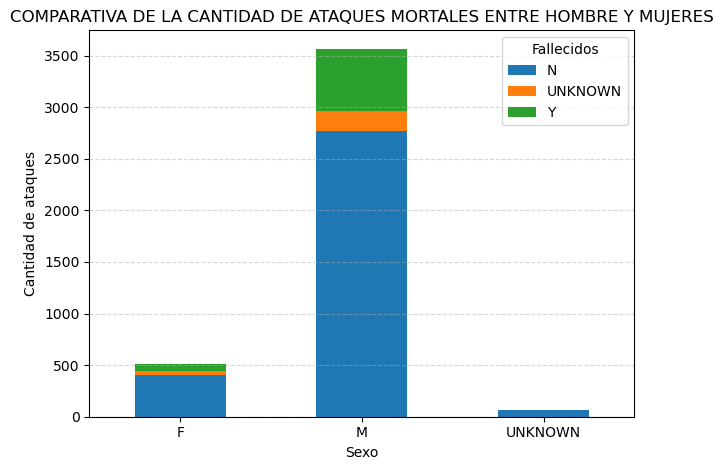

In [195]:
# Primero vamos a agrupar por sexo y fatal y contar la cantidad de ataques
Fatal_cont = df_hipotesis.groupby(['Sex', 'Fatal']).size().unstack()

# Gráfico
Fatal_cont.plot(kind='bar', stacked=True)
plt.title('COMPARATIVA DE LA CANTIDAD DE ATAQUES MORTALES ENTRE HOMBRE Y MUJERES')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de ataques')
plt.xticks(rotation=0)
plt.legend(title='Fallecidos')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('/Users/davidmartinfernandez/Desktop/Ironhack/Proyectos/Project_sharks/image/hipotesis_1.png')
plt.show()

## Hipótesis 2

### La segunda hipótesis que planteo es: Creo que entre los 10 países dónde más ataques se producen no habrá ninguno Europeo. ¿Vamos a averiguarlo?

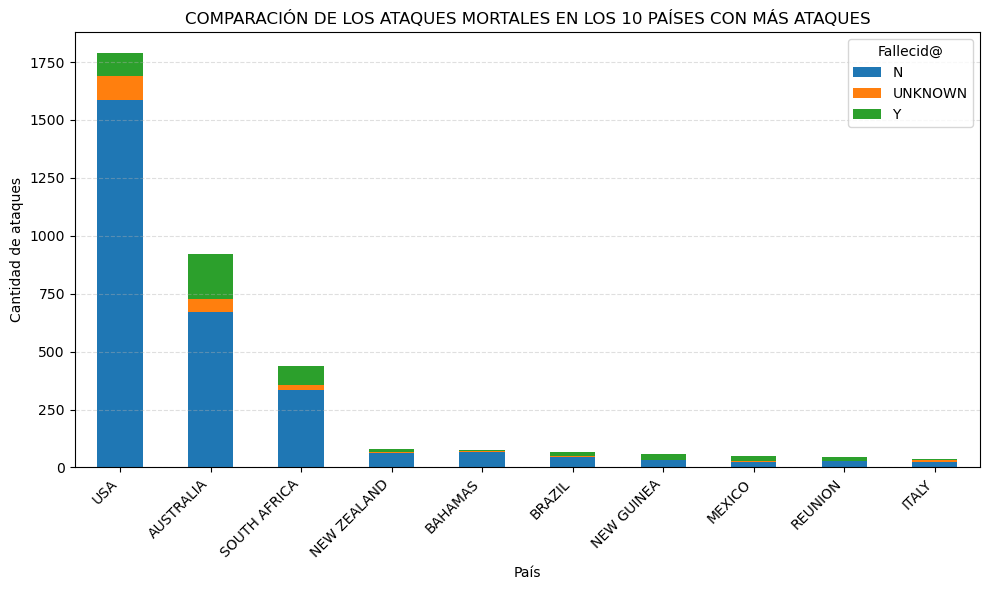

In [196]:
#En primer lugar vamos a calcular la cantidad total de ataques por país
ataques_por_pais = df_hipotesis.groupby('Country').size().sort_values(ascending=False)

#Ahora vamos a seleccionar los 10 países donde se ha producido más ataques.
top10_paises = ataques_por_pais.head(10).index

#Filtro el DataFrame para incluir solo los datos de los 10 países.
df_top10_paises = df_hipotesis[df_hipotesis['Country'].isin(top10_paises)]

#Ahora agrupo por país y si ha sido fatal o no y contamos la cantidad de ataques.
fatal_por_pais = df_top10_paises.groupby(['Country', 'Fatal']).size().unstack()

#Ahora ordeno los países de mayor a menor cantidad de ataques.
fatal_por_pais = fatal_por_pais.loc[top10_paises]

# Gráfico
fatal_por_pais.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('COMPARACIÓN DE LOS ATAQUES MORTALES EN LOS 10 PAÍSES CON MÁS ATAQUES')
plt.xlabel('País')
plt.ylabel('Cantidad de ataques')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Fallecid@')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig('/Users/davidmartinfernandez/Desktop/Ironhack/Proyectos/Project_sharks/image/hipotesis_2.png')
plt.show()

## Hipótesis 3

### ¿Creo que animal del año chino que tiene más influencia en el tiburón para que sea más agresivo y por lo tanto en ese año haya más ataques, es el Mono (Sabi). ¿Cuál es vuestr apuesta?

##### Lo primero que he hecho es hacer un unique de la varible year para ver que valores tengo en la varibale año.

In [134]:
print(sorted(df_hipotesis["Year"].unique()))

[1700, 1703, 1721, 1749, 1779, 1812, 1817, 1828, 1829, 1830, 1834, 1837, 1839, 1840, 1841, 1842, 1847, 1848, 1849, 1851, 1852, 1853, 1855, 1856, 1858, 1859, 1860, 1862, 1863, 1864, 1865, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 200

##### Una vez tengo los años, he definido un diccionario que mapee años los animales del zodíaco chino.

In [135]:
zodiaco_chino = {1700: 'Cerdo',1703: 'Serpiente',1721: 'Gallo',1749: 'Buey',
                 1779: 'Cabra',1812: 'Mono',1817: 'Serpiente',1828: 'Mono',
                 1829: 'Gallo',1830: 'Perro',1834: 'Caballo',1837: 'Rata',
                 1839: 'Conejo',1840: 'Dragón',1841: 'Serpiente',1842: 'Caballo',
                 1847: 'Cabra',1848: 'Mono',1849: 'Gallo',1851: 'Conejo',
                 1852: 'Dragón',1853: 'Serpiente',1855: 'Cabra',1856: 'Mono',
                 1858: 'Tigre',1859: 'Conejo',1860: 'Dragón',1862: 'Tigre',
                 1863: 'Cabra',1864: 'Mono',1865: 'Gallo',1868: 'Rata',1869: 'Buey',
                 1870: 'Tigre',1871: 'Conejo',1872: 'Dragón',1873: 'Serpiente',
                 1874: 'Caballo',1875: 'Cabra',1877: 'Serpiente',1878: 'Caballo',
                 1879: 'Cabra',1880: 'Mono',1881: 'Gallo',1882: 'Perro',
                 1883: 'Cerdo',1884: 'Rata',1885: 'Buey',1886: 'Tigre',
                 1887: 'Conejo',1888: 'Dragón',1889: 'Serpiente',1890: 'Caballo',
                 1891: 'Cabra',1892: 'Mono',1893: 'Gallo',1894: 'Perro',
                 1895: 'Cerdo',1896: 'Rata',1897: 'Buey',1898: 'Tigre',
                 1899: 'Conejo',1900: 'Dragón',1901: 'Serpiente',1902: 'Caballo',
                 1903: 'Cabra',1904: 'Mono',1905: 'Gallo',1906: 'Perro',
                 1907: 'Cerdo',1908: 'Rata',1909: 'Buey',1910: 'Tigre',
                 1911: 'Conejo',1912: 'Dragón',1913: 'Serpiente',1914: 'Caballo',
                 1915: 'Cabra',1916: 'Mono',1917: 'Gallo',1918: 'Perro',
                 1919: 'Cerdo',1920: 'Rata',1921: 'Buey',1922: 'Tigre',
                 1923: 'Conejo',1924: 'Dragón',1925: 'Serpiente',1926: 'Caballo',
                 1927: 'Cabra',1928: 'Mono',1929: 'Gallo',1930: 'Perro',
                 1931: 'Cerdo',1932: 'Rata',1933: 'Buey',1934: 'Tigre',
                 1935: 'Conejo',1936: 'Dragón',1937: 'Serpiente',1938: 'Caballo',
                 1939: 'Cabra',1940: 'Mono',1941: 'Gallo',1942: 'Perro',
                 1943: 'Cerdo',1944: 'Rata',1945: 'Buey',1946: 'Tigre',
                 1947: 'Conejo',1948: 'Dragón',1949: 'Serpiente',1950: 'Caballo',
                 1951: 'Cabra',1952: 'Mono',1953: 'Gallo',1954: 'Perro',
                 1955: 'Cerdo',1956: 'Rata',1957: 'Buey',1958: 'Tigre',
                 1959: 'Conejo',1960: 'Dragón',1961: 'Serpiente',1962: 'Caballo',
                 1963: 'Cabra',1964: 'Mono',1965: 'Gallo',1966: 'Perro',
                 1967: 'Cerdo',1968: 'Rata',1969: 'Buey',1970: 'Tigre',
                 1971: 'Conejo',1972: 'Dragón',1973: 'Serpiente',1974: 'Caballo',
                 1975: 'Cabra',1976: 'Mono',1977: 'Gallo',1978: 'Perro',
                 1979: 'Cerdo',1980: 'Rata',1981: 'Buey',1982: 'Tigre',
                 1983: 'Conejo',1984: 'Dragón',1985: 'Serpiente',1986: 'Caballo',
                 1987: 'Cabra',1988: 'Mono',1989: 'Gallo',1990: 'Perro',
                 1991: 'Cerdo',1992: 'Rata',1993: 'Buey',1994: 'Tigre',
                 1995: 'Conejo',1996: 'Rata',1997: 'Gallo',1998: 'Perro',
                 1999: 'Cerdo',2000: 'Dragón',2001: 'Serpiente',2002: 'Caballo',
                 2003: 'Cabra',2004: 'Mono',2005: 'Gallo',2006: 'Perro',
                 2007: 'Cerdo',2008: 'Rata',2009: 'Buey',2010: 'Tigre',
                 2011: 'Conejo',2012: 'Dragón',2013: 'Serpiente',2014: 'Caballo',
                 2015: 'Cabra',2016: 'Mono',2017: 'Gallo',2018: 'Perro'}

In [ ]:
##### He creado una función llamada chinise_year para posteriormente añadir una columna nueva al dataframe df_hipotesis.

In [189]:
def chinese_year(year):
    return zodiaco_chino.get(year)

df_hipotesis['Chinese Year'] = df_hipotesis['Year'].apply(chinese_year)

In [190]:
df_hipotesis

,Country,Fatal,Year,Sex,Chinese Year
0,USA,N,2018,F,Perro
1,USA,N,2018,F,Perro
2,USA,N,2018,M,Perro
3,AUSTRALIA,N,2018,M,Perro
4,MEXICO,N,2018,M,Perro
...,...,...,...,...,...
6265,IRAQ,Y,1941,M,Gallo
6266,SAUDI ARABIA,Y,1945,M,Buey
6267,SAUDI ARABIA,N,1945,M,Buey
6296,AUSTRALIA,Y,1905,M,Gallo


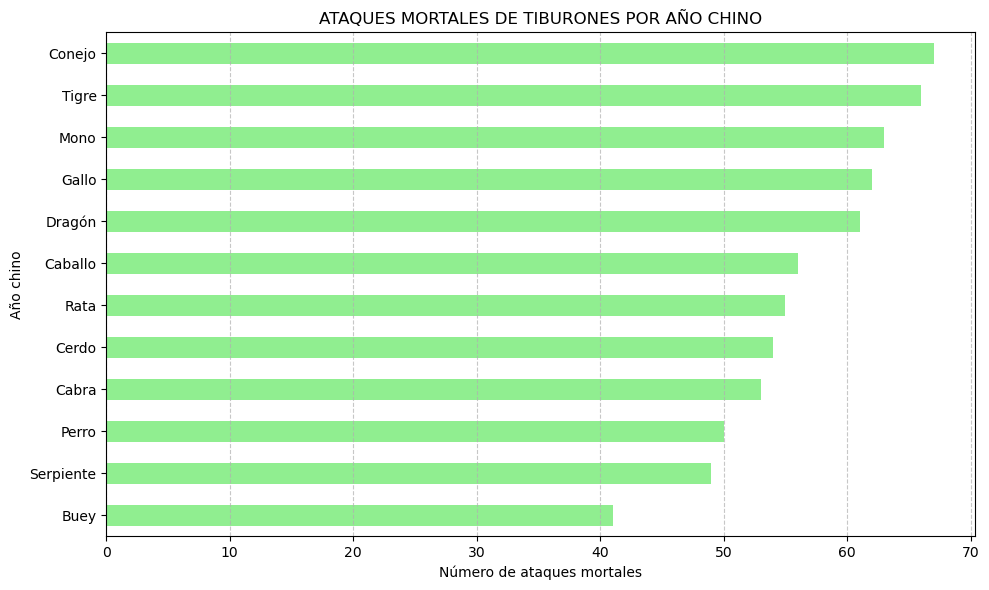

In [197]:
#Vamos a filtrar los ataques mortales y contarlos por año chino
ataques_mortales = df_hipotesis[df_hipotesis['Fatal']== 'Y'].groupby('Chinese Year').size()

# Vamos a ordenar los datos ataques no mortales por número de ataques de mayor a menor
ataques_mortales = ataques_mortales.sort_values(ascending=True)

# Crear el gráfico de barras horizontales para los ataques no mortales
plt.figure(figsize=(10, 6))
ataques_mortales.plot(kind='barh', color='lightgreen')
plt.title('ATAQUES MORTALES DE TIBURONES POR AÑO CHINO')
plt.xlabel('Número de ataques mortales')
plt.ylabel('Año chino')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig('/Users/davidmartinfernandez/Desktop/Ironhack/Proyectos/Project_sharks/image/hipotesis_3.png')
plt.tight_layout();